# All Request types by Council District, Including Covid Map

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
hub_nash=pd.read_csv('../class_data/hub_requests.csv')

/Users/nicolemuldowney/opt/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hub_nash.head()

Request #  Status                Request Type  \
0     113016  Closed   Trash, Recycling & Litter   
1     126185  Closed  Streets, Roads & Sidewalks   
2     119344  Closed   Trash, Recycling & Litter   
3     127752  Closed   Trash, Recycling & Litter   
4     113477  Closed   Trash, Recycling & Litter   

                     Subrequest Type            Additional Subrequest Type  \
0                       Cart Service    Trash - Request an Additional Cart   
1          Blocking the Right of Way                                   NaN   
2                 Damage to Property                         Trash Service   
3       New Service/Activate Service  New Construction Residential Recycle   
4  Backdoor Trash or Recycle Waivers   Request Recycling Disability Waiver   

       Date / Time Opened      Date / Time Closed Request Origin  \
0  10/30/2018 01:47:00 PM  03/05/2019 09:35:00 PM          Phone   
1  12/28/2018 01:04:00 PM  12/28/2018 01:04:00 PM          Phone   
2  11/27/2018 02:20:00 PM  11/29/2018 04:04:00 AM          Phone   
3  01/03/2019 06:57:00 PM  01/09/2019 10:09:00 AM          Phone   
4  10/31/2018 12:20:00 PM  10/31/2018 04:10:00 PM          Phone   

            System of Origin ID Contact Type  ...  State Issue  \
0                           NaN          NaN  ...        False   
1  OE-00040610_12/27/2018 15:44          NaN  ...        False   
2                           NaN          NaN  ...        False   
3                           NaN          NaN  ...        False   
4                           NaN          NaN  ...        False   

   Parent Request  Closed When Created  \
0             NaN                False   
1             NaN                 True   
2             NaN                 True   
3             NaN                False   
4             NaN                 True   

                                             Address       City  \
0                                     2009 Upland Dr  NASHVILLE   
1                        ELM HILL PKE / DONELSON PKE  NASHVILLE   
2  597 Westchester Dr, Nashville, TN 37115, Unite...    MADISON   
3                                        Ruffian Way        NaN   
4  2326 Smith Springs Rd, Nashville, TN 37217, Un...  NASHVILLE   

  Council District    ZIP   Latitude  Longitude             Mapped Location  
0              7.0  37216  36.198638 -86.706659   (36.1986378, -86.7066586)  
1             15.0  37214  36.148809 -86.666282  (36.14880891, -86.6662816)  
2              8.0  37115  36.263020 -86.738630       (36.26302, -86.73863)  
3              NaN    NaN  38.097609 -84.554097   (38.0976091, -84.5540971)  
4             29.0  37217  36.096460 -86.637440       (36.09646, -86.63744)  

[5 rows x 21 columns]

In [4]:
hub_nash['Council District'].value_counts()

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [5]:
hub_nash_after=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [6]:
hub_nash_after.head()

Request #  Status                Request Type  \
0     113016  Closed   Trash, Recycling & Litter   
1     126185  Closed  Streets, Roads & Sidewalks   
2     119344  Closed   Trash, Recycling & Litter   
3     127752  Closed   Trash, Recycling & Litter   
4     113477  Closed   Trash, Recycling & Litter   

                     Subrequest Type            Additional Subrequest Type  \
0                       Cart Service    Trash - Request an Additional Cart   
1          Blocking the Right of Way                                   NaN   
2                 Damage to Property                         Trash Service   
3       New Service/Activate Service  New Construction Residential Recycle   
4  Backdoor Trash or Recycle Waivers   Request Recycling Disability Waiver   

       Date / Time Opened      Date / Time Closed Request Origin  \
0  10/30/2018 01:47:00 PM  03/05/2019 09:35:00 PM          Phone   
1  12/28/2018 01:04:00 PM  12/28/2018 01:04:00 PM          Phone   
2  11/27/2018 02:20:00 PM  11/29/2018 04:04:00 AM          Phone   
3  01/03/2019 06:57:00 PM  01/09/2019 10:09:00 AM          Phone   
4  10/31/2018 12:20:00 PM  10/31/2018 04:10:00 PM          Phone   

            System of Origin ID Contact Type  Parent Request  \
0                           NaN          NaN             NaN   
1  OE-00040610_12/27/2018 15:44          NaN             NaN   
2                           NaN          NaN             NaN   
3                           NaN          NaN             NaN   
4                           NaN          NaN             NaN   

   Closed When Created                                            Address  \
0                False                                     2009 Upland Dr   
1                 True                        ELM HILL PKE / DONELSON PKE   
2                 True  597 Westchester Dr, Nashville, TN 37115, Unite...   
3                False                                        Ruffian Way   
4                 True  2326 Smith Springs Rd, Nashville, TN 37217, Un...   

        City  Council District    ZIP   Latitude  Longitude  
0  NASHVILLE               7.0  37216  36.198638 -86.706659  
1  NASHVILLE              15.0  37214  36.148809 -86.666282  
2    MADISON               8.0  37115  36.263020 -86.738630  
3        NaN               NaN    NaN  38.097609 -84.554097  
4  NASHVILLE              29.0  37217  36.096460 -86.637440

In [7]:
type(hub_nash_after)

pandas.core.frame.DataFrame

In [8]:
clean_hub_nash=hub_nash_after.dropna(subset=['Council District','Request Type'])

In [9]:
#groupby the dataframe
council_hub_nash=clean_hub_nash.groupby(['Council District',
                                        'ZIP'
                                        ]).ZIP.agg('count').to_frame('count')

In [10]:
council_hub_nash

count
Council District ZIP           
1.0              37015.0    161
                 37072.0     52
                 37080.0    703
                 37189.0    229
                 37218.0   4079
...                         ...
35.0             37221.0   1497
                 37064        8
                 37143       36
                 37209      122
                 37221      457

[309 rows x 1 columns]

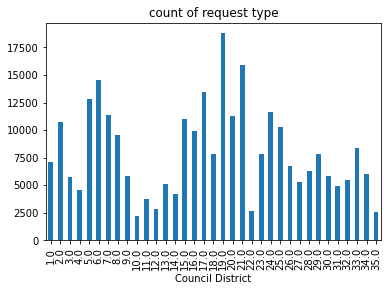

In [11]:
#another way to groupby the dataframe
council_hub_nash = clean_hub_nash.groupby(['Council District'])['Request Type'].count()

council_hub_nash.plot.bar()
plt.xticks(rotation = 90)
plt.title('count of request type');

KeyError: 'ZIP'

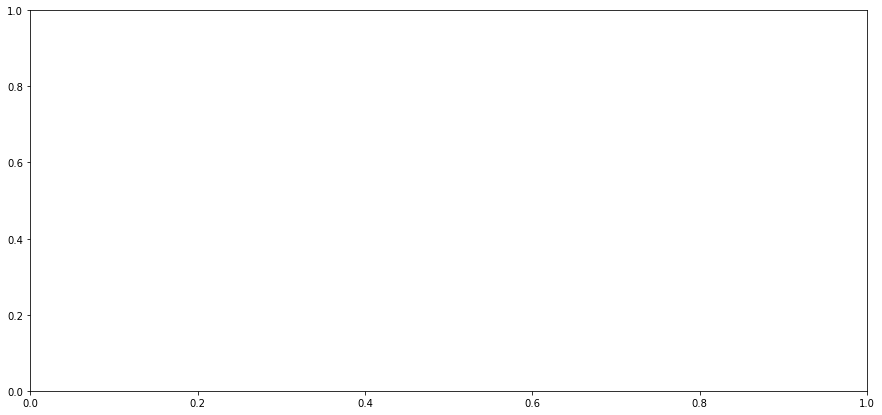

In [12]:
 #plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
council_hub_nash.groupby(['Council District','ZIP']).count()['count'].unstack().plot(ax=ax)

In [13]:
print(type(clean_hub_nash.groupby('Request Type').count()))
clean_hub_nash.groupby('Request Type').count().head()

<class 'pandas.core.frame.DataFrame'>


Request #  Status  Subrequest Type  \
Request Type                                                   
COVID-19                       2689    2689             2686   
Education & Libraries            13      13               13   
Electric & Water General       4007    4007             4002   
Hands On Volunteers            1575    1575             1575   
Other                          1922    1922             1912   

                          Additional Subrequest Type  Date / Time Opened  \
Request Type                                                               
COVID-19                                        2456                2689   
Education & Libraries                              0                  13   
Electric & Water General                           0                4007   
Hands On Volunteers                             1575                1575   
Other                                             17                1922   

                          Date / Time Closed  Request Origin  \
Request Type                                                   
COVID-19                                2514            2689   
Education & Libraries                      4              13   
Electric & Water General                3132            4007   
Hands On Volunteers                     1575            1575   
Other                                   1787            1922   

                          System of Origin ID  Contact Type  Parent Request  \
Request Type                                                                  
COVID-19                                    0            18               1   
Education & Libraries                       0             3               0   
Electric & Water General                   44           477               5   
Hands On Volunteers                         0             2               0   
Other                                     484            44              25   

                          Closed When Created  Address  City  \
Request Type                                                   
COVID-19                                 2689     2678  2683   
Education & Libraries                      13       13    13   
Electric & Water General                 4007     3964  3990   
Hands On Volunteers                      1575     1575  1575   
Other                                    1922     1918  1918   

                          Council District   ZIP  Latitude  Longitude  
Request Type                                                           
COVID-19                              2689  2682      2689       2689  
Education & Libraries                   13    13        13         13  
Electric & Water General              4007  3989      3976       3976  
Hands On Volunteers                   1575  1575      1575       1575  
Other                                 1922  1917      1921       1921

In [14]:
clean_hub_nash.groupby('Request Type').count().reset_index().head()

Request Type  Request #  Status  Subrequest Type  \
0                  COVID-19       2689    2689             2686   
1     Education & Libraries         13      13               13   
2  Electric & Water General       4007    4007             4002   
3       Hands On Volunteers       1575    1575             1575   
4                     Other       1922    1922             1912   

   Additional Subrequest Type  Date / Time Opened  Date / Time Closed  \
0                        2456                2689                2514   
1                           0                  13                   4   
2                           0                4007                3132   
3                        1575                1575                1575   
4                          17                1922                1787   

   Request Origin  System of Origin ID  Contact Type  Parent Request  \
0            2689                    0            18               1   
1              13                    0             3               0   
2            4007                   44           477               5   
3            1575                    0             2               0   
4            1922                  484            44              25   

   Closed When Created  Address  City  Council District   ZIP  Latitude  \
0                 2689     2678  2683              2689  2682      2689   
1                   13       13    13                13    13        13   
2                 4007     3964  3990              4007  3989      3976   
3                 1575     1575  1575              1575  1575      1575   
4                 1922     1918  1918              1922  1917      1921   

   Longitude  
0       2689  
1         13  
2       3976  
3       1575  
4       1921

In [22]:
#Filter only COVID-19 in request type columns
covid= clean_hub_nash.loc[(clean_hub_nash['Request Type'] == "COVID-19")]

In [23]:
covid.groupby(['Council District', 'Request Type'] )['Request Type'].count()

Council District  Request Type
1.0               COVID-19         31
2.0               COVID-19        102
3.0               COVID-19         44
4.0               COVID-19         23
5.0               COVID-19         96
6.0               COVID-19         51
7.0               COVID-19         52
8.0               COVID-19         82
9.0               COVID-19        100
10.0              COVID-19        130
11.0              COVID-19         98
12.0              COVID-19         13
13.0              COVID-19         76
14.0              COVID-19         63
15.0              COVID-19         99
16.0              COVID-19        101
17.0              COVID-19        172
18.0              COVID-19         50
19.0              COVID-19        370
20.0              COVID-19         94
21.0              COVID-19        101
22.0              COVID-19         73
23.0              COVID-19         27
24.0              COVID-19        110
25.0              COVID-19         70
26.0              C

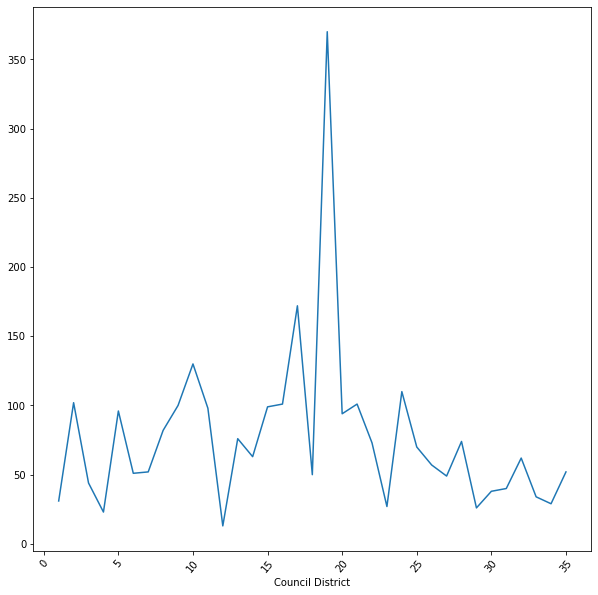

In [27]:
covid.groupby(['Council District'])['Request Type'].count().plot.line(figsize=(10, 10))
plt.xticks(rotation = 50);

In [28]:
covid['geometry'] = covid.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
covid.head(3)

Request #  Status Request Type      Subrequest Type  \
1516     330630  Closed     COVID-19                  NaN   
4562     339424  Closed     COVID-19  COVID-19 Violations   
4971     348304  Closed     COVID-19  COVID-19 Violations   

     Additional Subrequest Type      Date / Time Opened  \
1516                        NaN  03/22/2020 05:12:15 PM   
4562        COVID-19 Violations  04/04/2020 08:18:05 PM   
4971                        NaN  04/17/2020 09:30:20 PM   

          Date / Time Closed          Request Origin System of Origin ID  \
1516  03/23/2020 01:20:48 AM  hubNashville Community                 NaN   
4562  04/09/2020 02:20:19 PM  hubNashville Community                 NaN   
4971  04/21/2020 02:07:48 PM  hubNashville Community                 NaN   

     Contact Type  Parent Request  Closed When Created  \
1516          NaN             NaN                False   
4562          NaN             NaN                False   
4971          NaN             NaN                False   

                     Address       City  Council District    ZIP   Latitude  \
1516  1400 Rosa L Parks Blvd  NASHVILLE              19.0  37208  36.178773   
4562             800 Main St  NASHVILLE               6.0  37206  36.175009   
4971       130 LifeWay Plaza  NASHVILLE              19.0  37203  36.165020   

      Longitude                                     geometry  
1516 -86.794311  POINT (-86.79431099325409 36.1787729116136)  
4562 -86.758545   POINT (-86.75854459325407 36.175009161612)  
4971 -86.789680                   POINT (-86.78968 36.16502)

In [29]:
cluster_map_covid = folium.Map(location = [36.1612,-86.7775], zoom_start = 11)
marker_cluster = MarkerCluster().add_to(cluster_map_covid)
#need to add code here for GIS council district polygons
#folium.GeoJson(polygon_nashville).add_to(cluster_map_covid)

for row_index, row_values in covid.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = "Request Type: " + str(row_values['Request Type']) + " - Subrequest Type: " + str(row_values[ 'Subrequest Type']) + "- Additional Subrequest Type: " + str(row_values[ 'Additional Subrequest Type'])
    marker = folium.Marker(
        location = loc, 
        popup = '<strong>' + pop + '</strong>',
        icon=folium.Icon(color='lightred', icon='hand-stop-o',prefix='fa') )
    marker.add_to(marker_cluster)

#to save map as html
#cluster_map_covid.save('../maps/clustercovid.html')

cluster_map_covid  